# ETF

In this notebook we play around with some ETF data.

## EMQQ

emerging markets internet &  ecommerce etf. 

In [66]:
import os
import logging
import numpy as np
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")
cp = sns.color_palette()

from matplotlib import cm

df = pd.read_csv("data/emqq-holdings-03-28-2021.csv",
                sep=",")

df["%"] = df["% OF NET ASSET VALUES"].apply(lambda x:float(x[:-1]))
df.head()

COMPANY NAME   TICKER          FIGI   SHARES  MARKET VALUE  \
0  ALIBABA GROUP HOLDING-SP ADR     BABA  BBG006G2JVL2   646008  1.438789e+08   
1          TENCENT HOLDINGS LTD   700 HK  BBG000BJ35F4  1773992  1.383764e+08   
2                       MEITUAN  3690 HK  BBG00LLV9WV7  3503300  1.295990e+08   
3                    JD.COM INC       JD  BBG005YHY0Q7  1394731  1.097793e+08   
4             NASPERS LTD-N SHS   NPN SJ  BBG000CTYB00   474416  1.085018e+08   

  % OF NET ASSET VALUES     %  
0                 8.30%  8.30  
1                 7.98%  7.98  
2                 7.47%  7.47  
3                 6.33%  6.33  
4                 6.26%  6.26

In [2]:
"$%.1f" % (df["MARKET VALUE"].sum())

'$1733768463.5'

In [3]:
df.tail()

COMPANY NAME     TICKER          FIGI   SHARES  MARKET VALUE  \
93            KGINICIS CO LTD  035600 KS  BBG000PM6F03    21081     353458.35   
94  PHOENIX TREE HOLDINGS LTD        DNK  BBG00QQ109W6   179833     425664.71   
95                  YUNJI INC         YJ  BBG00NPL7MC6   138161     297046.15   
96         PC HOME ONLINE INC    8044 TT  BBG000DCXLY8   123000     378355.70   
97               CASH & OTHER        NaN           NaN  8140731    8140731.57   

   % OF NET ASSET VALUES     %  
93                 0.02%  0.02  
94                 0.02%  0.02  
95                 0.02%  0.02  
96                 0.02%  0.02  
97                 0.47%  0.47

In [4]:
ticker = list(df.TICKER)

def _read_ticker(ticker):
    tmp = pandas_datareader.get_data_tiingo(
        ticker, api_key=os.getenv('TIINGO_API_KEY'))
    tmp = tmp.reset_index().set_index("date").rename(
            columns={"close": ticker})[[ticker]]
    return tmp

_read_ticker(ticker[0]).head()

BABA
date                            
2016-04-11 00:00:00+00:00  77.71
2016-04-12 00:00:00+00:00  77.86
2016-04-13 00:00:00+00:00  79.64
2016-04-14 00:00:00+00:00  79.61
2016-04-15 00:00:00+00:00  78.97

In [5]:
data = []
for tick in ticker:
    try:
        val = _read_ticker(tick)
        data.append(val)
    except:
        logging.warning("skipping %s" %tick)
    
len(data)

48

In [6]:
tmp = data[0]
for d in data[1:]:
    tmp = tmp.join(d)

df2 = tmp
df2.head()

BABA     JD  PDD    MELI    NTES  BEKE    BIDU  \
date                                                                         
2016-04-11 00:00:00+00:00  77.71  27.28  NaN  117.71  138.91   NaN  185.07   
2016-04-12 00:00:00+00:00  77.86  28.10  NaN  119.97  137.19   NaN  187.40   
2016-04-13 00:00:00+00:00  79.64  29.58  NaN  125.35  142.74   NaN  193.98   
2016-04-14 00:00:00+00:00  79.61  29.63  NaN  126.56  141.44   NaN  195.72   
2016-04-15 00:00:00+00:00  78.97  29.88  NaN  127.34  138.28   NaN  193.22   

                           LU  SE  CPNG  ...  AFYA  LX  SY   QIWI  SOGO  DUO  \
date                                     ...                                   
2016-04-11 00:00:00+00:00 NaN NaN   NaN  ...   NaN NaN NaN  14.63   NaN  NaN   
2016-04-12 00:00:00+00:00 NaN NaN   NaN  ...   NaN NaN NaN  15.74   NaN  NaN   
2016-04-13 00:00:00+00:00 NaN NaN   NaN  ...   NaN NaN NaN  16.27   NaN  NaN   
2016-04-14 00:00:00+00:00 NaN NaN   NaN  ...   NaN NaN NaN  16.40   NaN  NaN   
2016-04-15 00:00:00+00:00 NaN NaN   NaN  ...   NaN NaN NaN  15.99   NaN  NaN   

                           QTT  BLCT  DNK  YJ  
date                                           
2016-04-11 00:00:00+00:00  NaN   NaN  NaN NaN  
2016-04-12 00:00:00+00:00  NaN   NaN  NaN NaN  
2016-04-13 00:00:00+00:00  NaN   NaN  NaN NaN  
2016-04-14 00:00:00+00:00  NaN   NaN  NaN NaN  
2016-04-15 00:00:00+00:00  NaN   NaN  NaN NaN  

[5 rows x 48 columns]

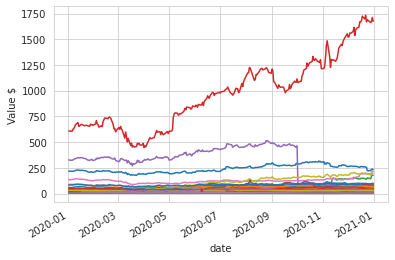

In [7]:
ax = df2.loc["2020"].plot()
plt.ylabel("Value $")
ax.get_legend().remove()

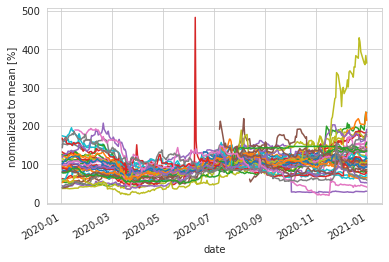

In [8]:
ax = df2.loc["2020"].apply(lambda x: x/(x.mean()/100), axis=0).plot()
plt.ylabel("normalized to mean [%]")
ax.get_legend().remove()

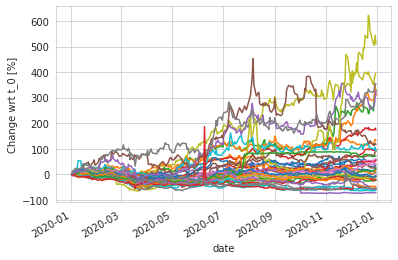

In [9]:
ax = df2.loc["2020"].apply(
    lambda x: (x - x[0])/(x[0]/100), axis=0).plot()

plt.ylabel("Change wrt t_0 [%]")
ax.get_legend().remove()

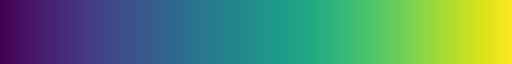

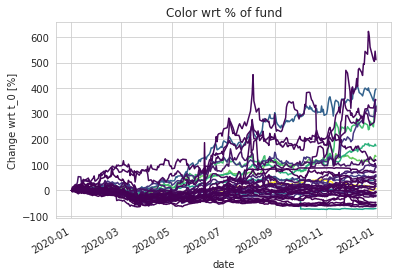

In [10]:
cmap = cm.get_cmap('viridis', (df["%"] * 100).astype(int).max())

tmp = df2.loc["2020"].apply(lambda x: (x - x[0])/(x[0]/100), axis=0)

_per = lambda x : (df.query(
    "TICKER == '%s'" %tmp.columns[x])["%"] * 100).astype(int).item()
_cmap = lambda x: cmap(_per(x))

_plot = lambda x: tmp[tmp.columns[x]].plot(color=_cmap(x))

for _ in range(len(tmp.columns)):
    _plot(_)
plt.ylabel("Change wrt t_0 [%]")
plt.title("Color wrt % of fund")
cmap

### Compare ETF wtith single stocks

Text(0, 0.5, 'Change wrt t_0 [%]')

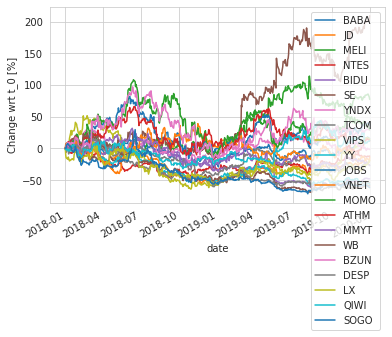

In [11]:
df3 = df2["2018":"2019"].apply(lambda x: (x - x[0])/(x[0]/100), axis=0)
df3 = df3.dropna(axis=1)
df3.plot()
plt.ylabel("Change wrt t_0 [%]")

Text(0, 0.5, 'Change wrt t_0 [%]')

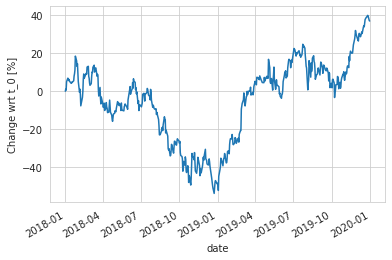

In [12]:
df4 = df3.copy()
for col in df4.columns:
    w = float(df.query("TICKER == '%s'" %col)["%"])
    df4[col] *= w
df4.mean(axis=1).plot()
plt.ylabel("Change wrt t_0 [%]")

Text(0, 0.5, 'Change wrt t_0 [%]')

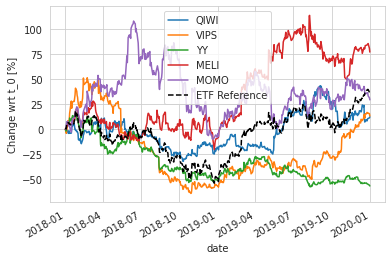

In [23]:
picks = {}
for _ in range(5):
    stockpick = df3.columns[np.random.randint(len(df3.columns))]
    tmp = df3[stockpick].plot(label=stockpick)
    picks[stockpick] = tmp

for _ in picks.keys():
    picks[_].plot(label=_)

df4.mean(axis=1).plot(label="ETF Reference", color="black", linestyle="--")


plt.legend()
plt.ylabel("Change wrt t_0 [%]")

Text(0, 0.5, 'Change wrt t_0 [%]')

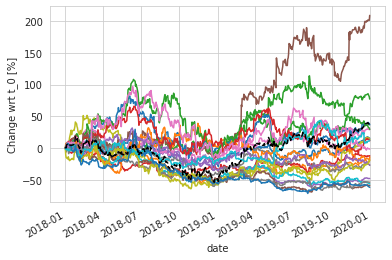

In [15]:
for _ in df3.columns:
    df3[_].plot(label=_)

ref = df4.mean(axis=1)
ref.plot(label="ETF Reference", color="black", linestyle="--")

#plt.legend()
plt.ylabel("Change wrt t_0 [%]")

In [16]:
compare = [0,0]

for _ in df3.columns:
    v = df3[_][-1]
    if v < ref[-1]:
        compare[0] += 1
    else:
        compare[1] += 1
        
compare

[19, 2]

We find that of the 21 stocks we looked at, 19 had a worse performance than the whole etf, where as only 2 outperformed it. Both outperforming stocks, outperformed by a lot, so investing in them opposed to the etf would have yielded a much higher return, but without knowing in advance which stocks are going to be winners, the ETF would have been a good investment.

### Compare time of investments

using this random start  2019-10-25 00:00:00+00:00  the yield is 30.0 %
using this random start  2019-12-26 00:00:00+00:00  the yield is -3.0 %
using this random start  2018-11-14 00:00:00+00:00  the yield is 75.9 %
using this random start  2018-09-13 00:00:00+00:00  the yield is 65.0 %
using this random start  2019-06-17 00:00:00+00:00  the yield is 29.0 %
using this random start  2018-09-21 00:00:00+00:00  the yield is 63.3 %
using this random start  2018-11-30 00:00:00+00:00  the yield is 71.3 %
using this random start  2018-02-15 00:00:00+00:00  the yield is 27.9 %
using this random start  2018-06-15 00:00:00+00:00  the yield is 31.7 %
using this random start  2018-01-03 00:00:00+00:00  the yield is 35.9 %


Text(0, 0.5, 'Change wrt t_0 [%]')

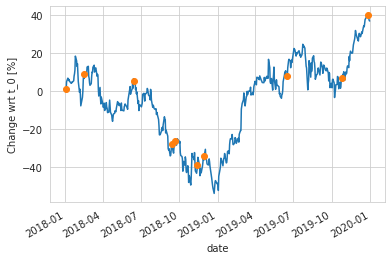

In [112]:
ax = ref.plot()

for _ in range(10):
    random_start = ref.index[np.random.randint(len(ref.index))]
    ax.plot(random_start, ref.loc[random_start], color=cp[1], marker='o')
    print("using this random start ", random_start, 
          " the yield is %.1f" %(ref.iloc[-1] - ref.loc[random_start]), "%")
    
plt.ylabel("Change wrt t_0 [%]")

using these spaced out starts the yield is 40.7 %


Text(0, 0.5, 'Change wrt t_0 [%]')

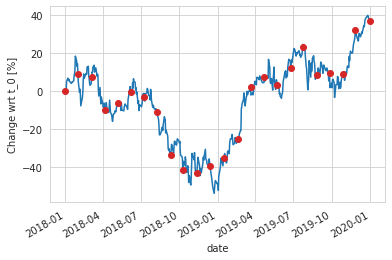

In [104]:
spaced_starts = [ref.index[_] for _ in np.linspace(0, len(ref.index)-1, num=24).astype(int)]


ax = ref.plot()
for idx in spaced_starts:
    ax.plot(idx, ref.loc[idx], color=cp[3], marker='o')

avg = 0
for idx in spaced_starts:
    avg += ref.iloc[-1] - ref.loc[idx]
avg /= len(spaced_starts)
    
print("using these spaced out starts the yield is %.1f" %(avg), "%")

plt.ylabel("Change wrt t_0 [%]")

We see that when picking a random start we can outperform the spaced starts by a lot, eg when starting at the low point, but again it is hard to know what the optimal starting point is in advance. Most random starting points are outperformed by the spaced out varient.